In [12]:
import numpy as np
import chainer
import chainer.functions as F
import chainer.links as L
import pandas as pd

In [33]:
batchsize=100
n_epoch=500
df=pd.read_csv('../dataset/sample.csv')
x_train=df['x']
x_test=df['x']
y_train=df['y']
y_test=df['y_org']
x_train=np.array(x_train).astype(np.float32).reshape(len(x_train),1)
x_test=np.array(x_test).astype(np.float32).reshape(len(x_test),1)
y_train=np.array(y_train).astype(np.float32).reshape(len(y_train),1)
y_test=np.array(y_test).astype(np.float32).reshape(len(y_test),1)
N = len(y_train)
N_test = len(y_test)
 

In [34]:
class MyModel (Chain):
    def __init__(self):
        super(MyModel, self).__init__(
            fc1=L.Linear(None,n_node),
            fc2=L.Linear(None,n_node),
            fc3=L.Linear(None,1),
        )
        
    def __call__(self,x_data,y_data,fi,train=True):
        x = chainer.Variable(x_data, volatile=not train)
        t = chainer.Variable(y_data, volatile=not train)
        
        h = F.concat((x, fi))
        h = F.dropout(F.relu(self.fc1(h)), train=train)
        h = F.concat((h, fi))
        h = F.dropout(F.relu(self.fc2(h)), train=train)
        h = self.fc3(h)
 
        return F.mean_squared_error(h, t)

In [35]:
model = MyModel()
optimizer = optimizers.Adam()
optimizer.setup(model)

In [36]:
T=[]
for epoch in range(1,n_epoch+1):
    print('epoch',epoch)
    #t=clock()
    perm=np.random.permutation(N)
    sum_loss=0
    for i in range(0,N,batchsize):
        x_batch=x_train[perm[i:i+batchsize]]
        y_batch=y_train[perm[i:i+batchsize]]
        fi_batch=np.ones((batchsize,1)).astype(np.float32)
        
        optimizer.zero_grads()
        loss=model(x_batch,y_batch,fi_batch)
        loss.backward()
        optimizer.update()
        sum_loss+=float(cuda.to_cpu(loss.data))*len(y_batch)
    print(' train mean loss={}'.format(sum_loss/N))
    T.append(sum_loss/N)

epoch 1
 train mean loss=6.168666002750396
epoch 2
 train mean loss=0.323932833224535
epoch 3
 train mean loss=0.2305823066830635
epoch 4
 train mean loss=0.17623971045017242
epoch 5
 train mean loss=0.15114615961909295
epoch 6
 train mean loss=0.12821440406143667
epoch 7
 train mean loss=0.1128974599391222
epoch 8
 train mean loss=0.10117179967463016
epoch 9
 train mean loss=0.09193356666713953
epoch 10
 train mean loss=0.08036025498062373
epoch 11
 train mean loss=0.07298236805945635
epoch 12
 train mean loss=0.06861823558807373
epoch 13
 train mean loss=0.0632687245309353
epoch 14
 train mean loss=0.058622557260096075
epoch 15
 train mean loss=0.05534679926931858
epoch 16
 train mean loss=0.0519487813487649
epoch 17
 train mean loss=0.04847261052578688
epoch 18
 train mean loss=0.047592074684798716
epoch 19
 train mean loss=0.047152758166193964
epoch 20
 train mean loss=0.042633745819330215
epoch 21
 train mean loss=0.04341734599322081
epoch 22
 train mean loss=0.040751111879944804


 train mean loss=0.013974856669083238
epoch 177
 train mean loss=0.013990797661244869
epoch 178
 train mean loss=0.013640182306990028
epoch 179
 train mean loss=0.013591573787853122
epoch 180
 train mean loss=0.013756314376369119
epoch 181
 train mean loss=0.013710111724212765
epoch 182
 train mean loss=0.013602498136460781
epoch 183
 train mean loss=0.013593616504222155
epoch 184
 train mean loss=0.013338782647624612
epoch 185
 train mean loss=0.013085242165252566
epoch 186
 train mean loss=0.013495515091344714
epoch 187
 train mean loss=0.013622666848823429
epoch 188
 train mean loss=0.013906517000868916
epoch 189
 train mean loss=0.013223455930128693
epoch 190
 train mean loss=0.013112802212126552
epoch 191
 train mean loss=0.013094524443149567
epoch 192
 train mean loss=0.01272353702224791
epoch 193
 train mean loss=0.013250394770875574
epoch 194
 train mean loss=0.013559956038370728
epoch 195
 train mean loss=0.012920572916045784
epoch 196
 train mean loss=0.012752615390345454
epo

 train mean loss=0.011036755116656423
epoch 349
 train mean loss=0.011573868319392205
epoch 350
 train mean loss=0.011235646242275833
epoch 351
 train mean loss=0.01140313538722694
epoch 352
 train mean loss=0.011106185894459487
epoch 353
 train mean loss=0.011200605556368828
epoch 354
 train mean loss=0.011456352923996747
epoch 355
 train mean loss=0.010981490011326969
epoch 356
 train mean loss=0.01088329624850303
epoch 357
 train mean loss=0.01120853317901492
epoch 358
 train mean loss=0.011306535415351392
epoch 359
 train mean loss=0.010982389333657921
epoch 360
 train mean loss=0.011503492761403323
epoch 361
 train mean loss=0.011077142329886555
epoch 362
 train mean loss=0.011247233618050814
epoch 363
 train mean loss=0.011040353751741349
epoch 364
 train mean loss=0.011317300288937985
epoch 365
 train mean loss=0.011023550690151752
epoch 366
 train mean loss=0.010952922198921442
epoch 367
 train mean loss=0.01139405719935894
epoch 368
 train mean loss=0.011225740583613515
epoch 

In [37]:
sum_loss=0
for i in range(0,N_test,batchsize):
    x_batch=x_test[i:i+batchsize]
    y_batch=y_test[i:i+batchsize]
    fi_batch=np.ones((batchsize,1)).astype(np.float32)
    
    loss=model(x_batch,y_batch,fi_batch)
    sum_loss+=float(cuda.to_cpu(loss.data))*len(y_batch)
print('test mean loss={}'.format(sum_loss/N_test))

test mean loss=0.005591464776080102


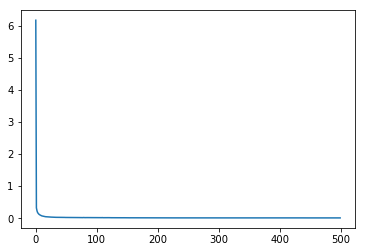

In [38]:
x = np.arange(0, n_epoch)
y = T
plt.plot(x,y)
plt.show()